In [ ]:
!pip install autoviz
!pip install xlrd

In [52]:
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go

from autoviz.AutoViz_Class import AutoViz_Class
from pandas_profiling import ProfileReport
from plotly.offline import init_notebook_mode, iplot, plot
from wordcloud import WordCloud

from torch.utils.data import Dataset

In [56]:
init_notebook_mode()
template_style = 'plotly_white'

Output hidden; open in https://colab.research.google.com to view.

In [4]:
# Load the data
class Dataset(Dataset):
    def __init__(self, path):
        self.load_data = pd.read_csv(path, encoding='ISO-8859-1')
    
    def __len__(self):
        return len(self.load_data)
    
    def __getitem__(self):
        return self.load_data

root = '/content/drive/MyDrive/Program/Python/Data ML DL/Datasets/US  E-commerce records 2020.csv'
load_data = Dataset(root)

In [5]:
# Info about the dataframe
load_data.__getitem__().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [6]:
# Describe method
load_data.__getitem__().describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


In [7]:
# Get a view of unique value in column, e.g 'Ship Mode'
load_data.__getitem__()['Ship Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [8]:
# NaN value for each column
load_data.__getitem__().isnull().sum()

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# Largest three of the sales in 2020
load_data.__getitem__().nlargest(3, 'Sales')

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
427,23-03-20,8154,CA-2017-140151,First Class,RB-19360,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2302,22-10-20,2624,CA-2017-127180,First Class,TA-21385,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
2644,17-11-20,4191,CA-2017-166709,Standard Class,HL-15040,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856


In [10]:
# Highest sales data
load_data.__getitem__().iloc[load_data.__getitem__()['Sales'].argmax()]

Order Date                                   23-03-20
Row ID                                           8154
Order ID                               CA-2017-140151
Ship Mode                                 First Class
Customer ID                                  RB-19360
Segment                                      Consumer
Country                                 United States
City                                          Seattle
State                                      Washington
Postal Code                                     98115
Region                                           West
Product ID                            TEC-CO-10004722
Category                                   Technology
Sub-Category                                  Copiers
Product Name    Canon imageCLASS 2200 Advanced Copier
Sales                                           14000
Quantity                                            4
Discount                                            0
Profit                      

In [11]:
# Find average discount, e.g for Chairs
mask = load_data.__getitem__()['Sub-Category'] == 'Chairs'
load_data.__getitem__()[mask]['Discount'].mean()

0.16736842105263156

## Total profit and sales by Sub-Category

In [12]:
load_data.__getitem__()['Profit Margin'] = load_data.__getitem__()['Profit'] / load_data.__getitem__()['Sales']

# Group the dataframe by sub category
load_data_by_subcategory = load_data.__getitem__().groupby('Sub-Category').sum()

# Reset index for new dataset
load_data_by_subcategory.reset_index(inplace=True)
load_data_by_subcategory.head()

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Profit Margin
0,Accessories,1449605,15762114,59946.2320,1079,19.80,15672.3570,62.655000
1,Appliances,874517,9377881,42926.9320,654,29.10,7865.2683,-36.133889
2,Art,1377681,16355998,8863.0680,1101,22.20,2221.9631,70.995000
3,Binders,2500416,29015384,72788.0450,2067,189.10,7669.7418,-107.832500
4,Bookcases,384522,4483249,30024.2797,276,16.32,-583.6261,-11.233641


## AutoViz Report
[documentation](https://pythonrepo.com/repo/AutoViML-AutoViz-python-data-validation)

Shape of your Data Set loaded: (3312, 20)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    20 Predictors classified...
        This does not include the Target column(s)
        9 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


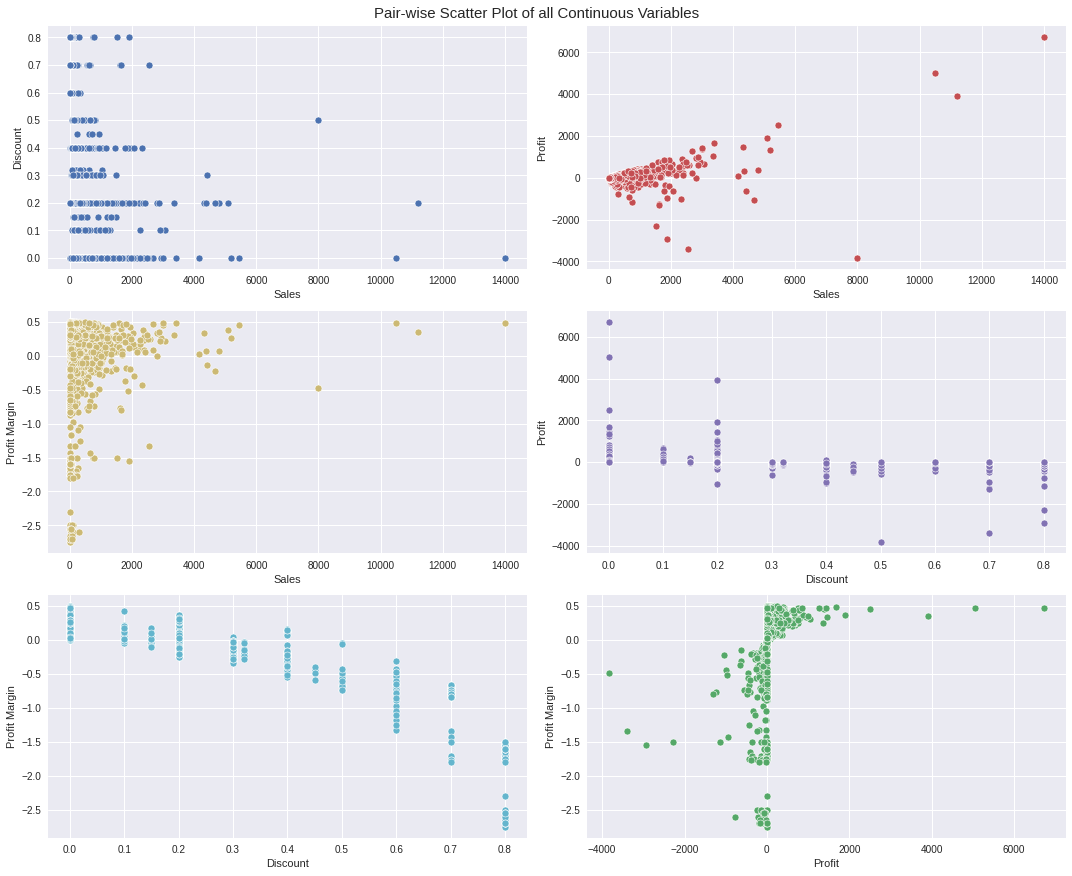

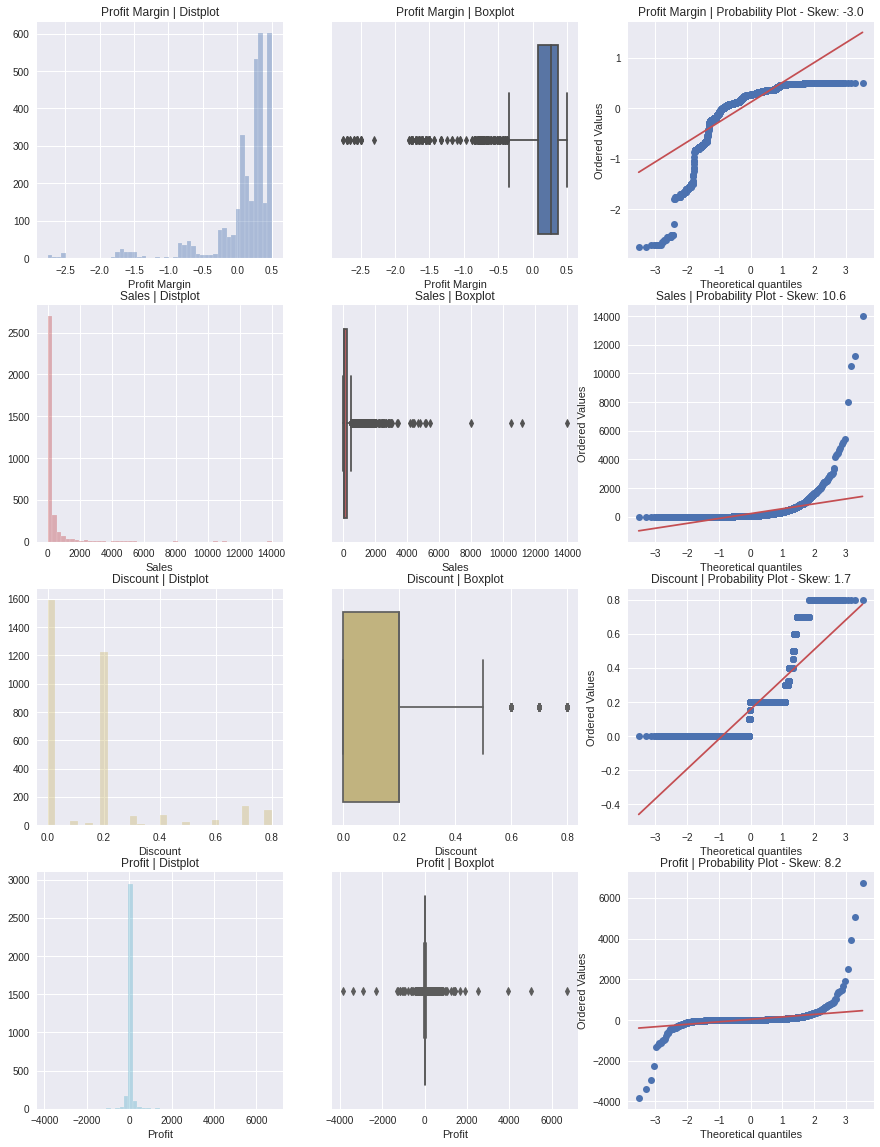

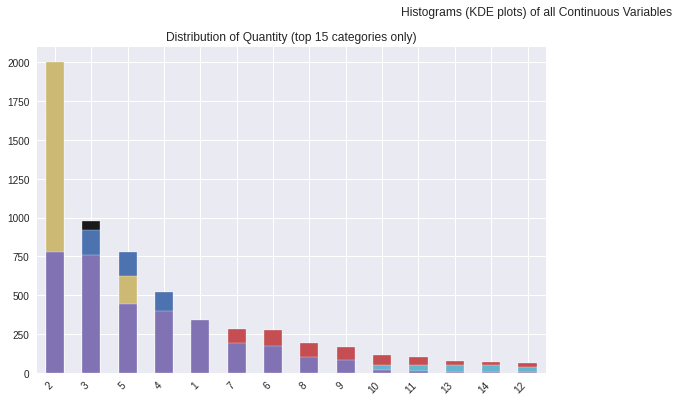

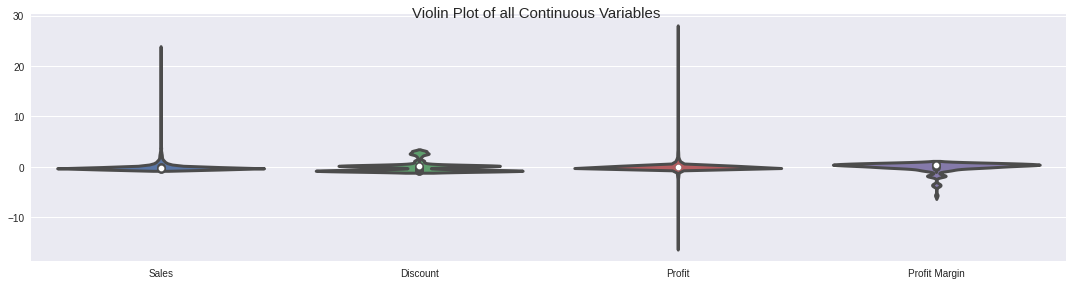

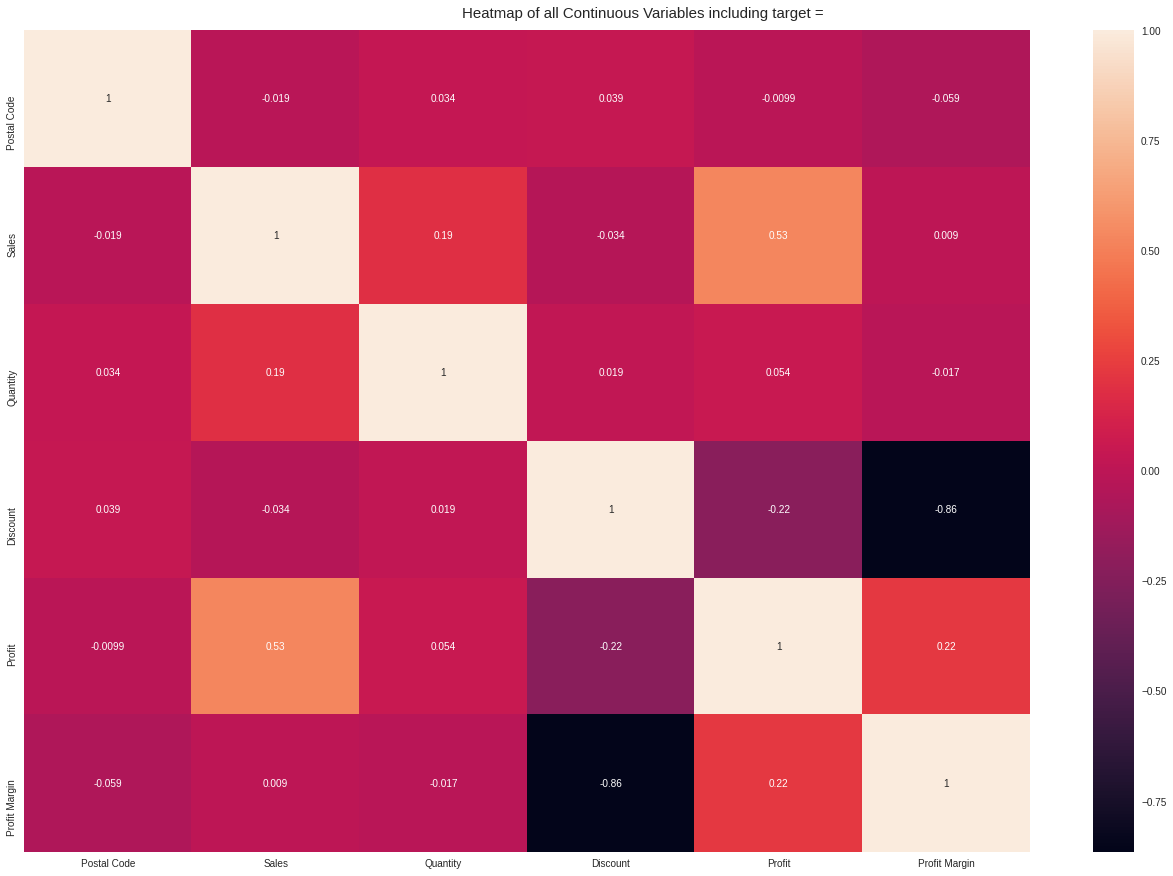

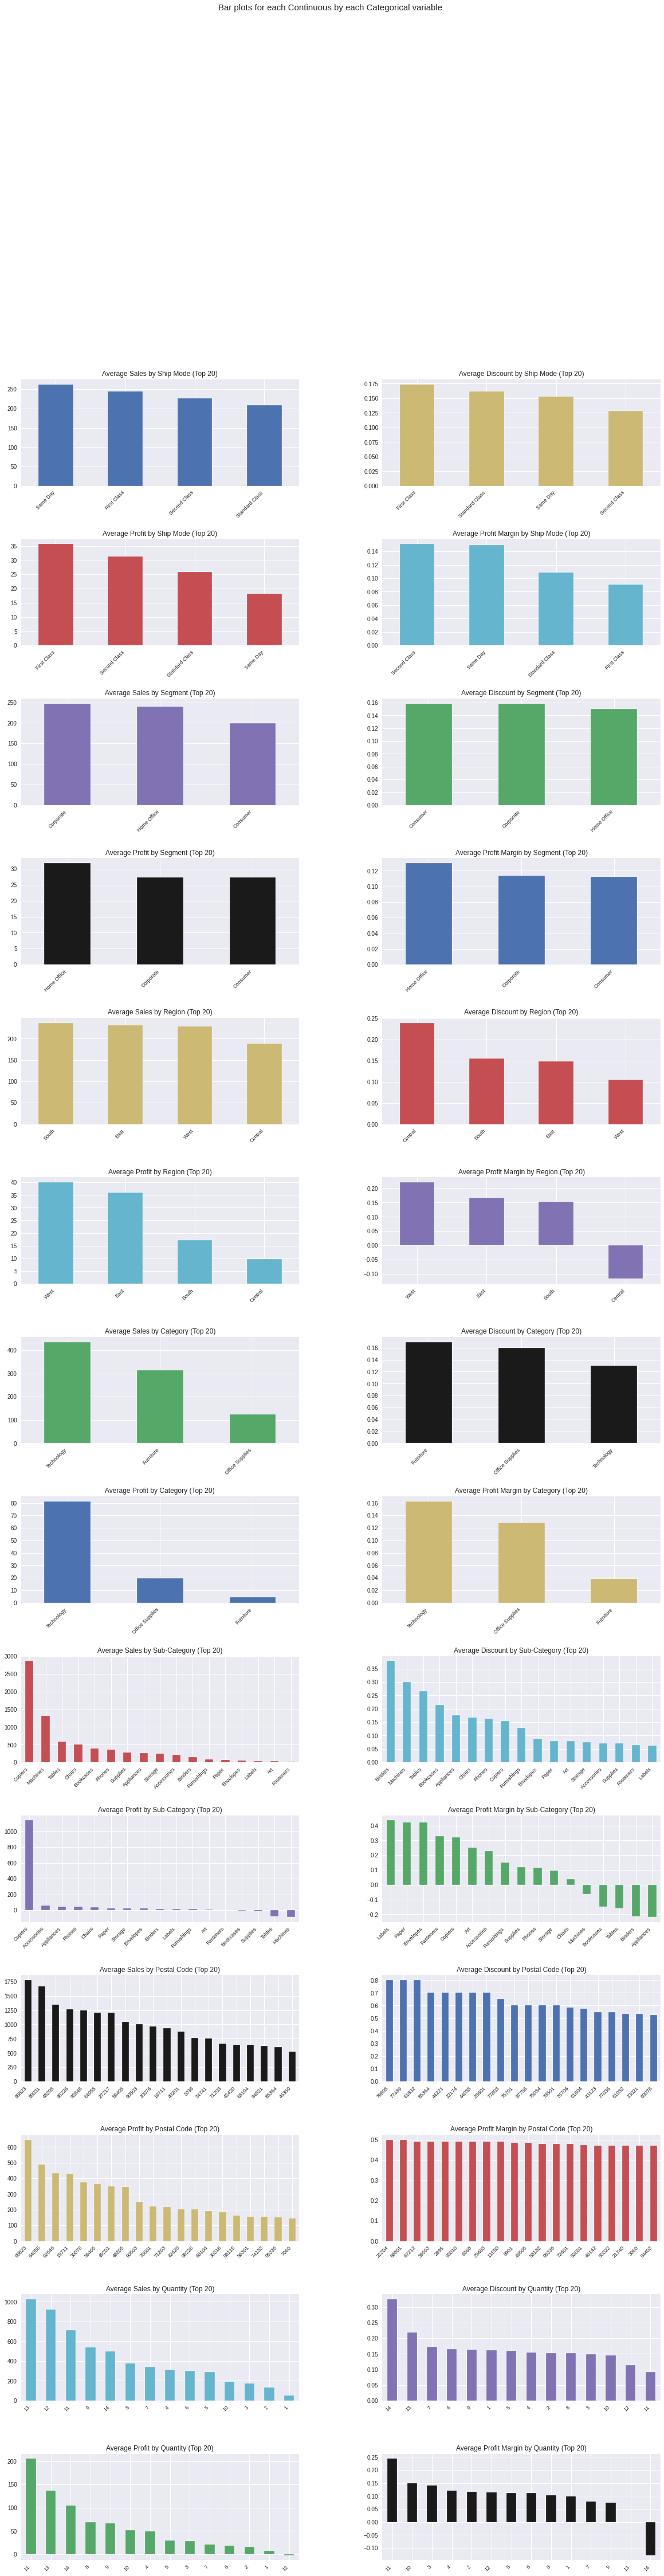

Time to run AutoViz (in seconds) = 14.102

 ###################### VISUALIZATION Completed ########################


In [13]:
AV = AutoViz_Class()
df_autoviz = AV.AutoViz(filename='', dfte=load_data.__getitem__())

In [58]:
df = px.data.tips()
fig = px.histogram(df, x='total_bill')
fig.show()